## CRC ML Course: Machine Learning in Scikit-learn (day 2 - I)

### The data

For the first example we will use the same yeast dataset that you already worked with in orange.To work with the data in python follow these steps:

1. Go to the data on [sciebo](https://fz-juelich.sciebo.de/apps/files/?dir=/CRC_MLCourse&fileid=1213327911)
2. Download the entire folder `datasets`
3. Put the folder `datasets` inside the directory in which your notebooks lay

Let's get started by importing the dependencies. If you get an error that some dependencies are not found, make sure that you are using the correct kernel, i.e. the environment called `mlcourse`.

In [36]:
# imports
from pathlib import Path
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

### Load and prepare the data
Next, we will load the data from the `datasets` directory as a pandas dataframe, inspect it and clean it. The cleaning involves dropping rows with missing data in any column entry.

In [9]:
# load data
dat_dir = Path('./datasets')
dat_fname = dat_dir / 'brown-selected.tab'
in_dat = pd.read_csv(dat_fname, sep='\t')

# inspect data
display(in_dat)

,alpha 0,alpha 7,alpha 14,alpha 21,alpha 28,alpha 35,alpha 42,alpha 49,alpha 56,alpha 63,...,cold 160,diau a,diau b,diau c,diau d,diau e,diau f,diau g,function,gene
0,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,...,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,d,string
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,?,-0.023,0.057,0.007,0.018,-0.057,0.009,-0.034,-0.016,-0.046,...,0.117,-0.041,-0.032,-0.051,-0.021,-0.023,-0.083,-0.032,Proteas,YGR270W
3,-0.031,-0.031,-0.06,0.037,-0.071,-0.018,-0.026,-0.052,0.018,0.052,...,-0.176,0.031,-0.024,0.018,0.003,-0.008,0.021,-0.113,Proteas,YIL075C
4,-0.013,?,0.067,-0.025,0.017,0.008,-0.042,0.013,0.111,0.015,...,0.034,0.096,0.048,0.065,-0.013,-0.075,0.216,0.038,Proteas,YDL007W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,0.008,-0.002,0.062,0.026,-0.002,-0.057,-0.006,-0.051,?,-0.092,...,-0.096,0.068,0.03,0.119,0.145,0.215,0.372,0.498,Resp,YKL141W
184,0.005,0.062,0.047,0.023,-0.019,-0.099,-0.016,-0.107,-0.047,-0.006,...,0.012,-0.031,-0.005,0.092,0.138,0.131,0.396,0.406,Resp,YDR178W
185,-0.043,-0.009,-0.036,-0.039,-0.123,-0.033,-0.033,-0.109,-0.102,-0.021,...,-0.135,-0.006,-0.014,0.072,0.153,0.203,0.362,0.373,Resp,YLL041C
186,-0.084,-0.064,-0.06,0.03,-0.044,0.002,0.048,-0.076,-0.058,-0.054,...,-0.098,0.012,-0.02,0.006,0.064,0.127,0.48,0.38,Resp,YFR033C


In [10]:
# clean data
in_dat.drop(labels=[0, 1], axis=0, inplace=True)
in_dat = in_dat[~in_dat.isin(['?']).any(axis=1)].copy()

# inspect data again
display(in_dat)

,alpha 0,alpha 7,alpha 14,alpha 21,alpha 28,alpha 35,alpha 42,alpha 49,alpha 56,alpha 63,...,cold 160,diau a,diau b,diau c,diau d,diau e,diau f,diau g,function,gene
3,-0.031,-0.031,-0.06,0.037,-0.071,-0.018,-0.026,-0.052,0.018,0.052,...,-0.176,0.031,-0.024,0.018,0.003,-0.008,0.021,-0.113,Proteas,YIL075C
10,0.093,0.027,0.044,0.066,-0.049,-0.011,-0.063,0.019,0.057,-0.087,...,-0.041,0.066,0.041,-0.027,-0.128,-0.134,0.2,-0.016,Proteas,YFR050C
18,-0.002,-0.009,-0.022,0.052,-0.083,0.031,-0.015,-0.007,0.039,0.044,...,-0.098,0.015,-0.013,0.1,0.044,-0.002,0.124,-0.033,Proteas,YGR135W
19,0.045,0.041,0.056,0.043,0.002,-0.032,0.081,0.051,0.062,-0.03,...,-0.086,0.024,-0.062,0.062,-0.058,-0.032,0.105,-0.032,Proteas,YER012W
20,-0.002,-0.048,0.017,-0.041,-0.022,-0.053,0.051,-0.014,0.007,-0.024,...,-0.007,0.002,-0.01,-0.034,-0.123,-0.048,-0.01,-0.262,Proteas,YPR103W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.019,-0.027,0.021,-0.04,0.027,-0.107,0.077,-0.091,0.008,-0.045,...,-0.048,-0.053,-0.048,0.048,0.043,0.091,0.248,0.32,Resp,YDL067C
177,-0.088,-0.002,-0.008,-0.061,-0.103,-0.16,-0.08,-0.135,-0.063,-0.061,...,-0.029,0.013,0.038,-0.013,0.008,0.029,0.124,0.172,Resp,YPR191W
184,0.005,0.062,0.047,0.023,-0.019,-0.099,-0.016,-0.107,-0.047,-0.006,...,0.012,-0.031,-0.005,0.092,0.138,0.131,0.396,0.406,Resp,YDR178W
186,-0.084,-0.064,-0.06,0.03,-0.044,0.002,0.048,-0.076,-0.058,-0.054,...,-0.098,0.012,-0.02,0.006,0.064,0.127,0.48,0.38,Resp,YFR033C


Next, we choose only the relvant feature columns (X) and the `function` column as our target column (y).

In [11]:
X = in_dat.drop(labels=['function','gene'], axis=1).copy()
y = in_dat[['function']].copy()

# inspect X and y
display(X)
display(y)

,alpha 0,alpha 7,alpha 14,alpha 21,alpha 28,alpha 35,alpha 42,alpha 49,alpha 56,alpha 63,...,cold 20,cold 40,cold 160,diau a,diau b,diau c,diau d,diau e,diau f,diau g
3,-0.031,-0.031,-0.06,0.037,-0.071,-0.018,-0.026,-0.052,0.018,0.052,...,-0.212,-0.176,-0.176,0.031,-0.024,0.018,0.003,-0.008,0.021,-0.113
10,0.093,0.027,0.044,0.066,-0.049,-0.011,-0.063,0.019,0.057,-0.087,...,0.003,-0.019,-0.041,0.066,0.041,-0.027,-0.128,-0.134,0.2,-0.016
18,-0.002,-0.009,-0.022,0.052,-0.083,0.031,-0.015,-0.007,0.039,0.044,...,-0.07,-0.187,-0.098,0.015,-0.013,0.1,0.044,-0.002,0.124,-0.033
19,0.045,0.041,0.056,0.043,0.002,-0.032,0.081,0.051,0.062,-0.03,...,-0.054,-0.152,-0.086,0.024,-0.062,0.062,-0.058,-0.032,0.105,-0.032
20,-0.002,-0.048,0.017,-0.041,-0.022,-0.053,0.051,-0.014,0.007,-0.024,...,0.017,-0.113,-0.007,0.002,-0.01,-0.034,-0.123,-0.048,-0.01,-0.262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.019,-0.027,0.021,-0.04,0.027,-0.107,0.077,-0.091,0.008,-0.045,...,0.064,0.016,-0.048,-0.053,-0.048,0.048,0.043,0.091,0.248,0.32
177,-0.088,-0.002,-0.008,-0.061,-0.103,-0.16,-0.08,-0.135,-0.063,-0.061,...,0.055,0.107,-0.029,0.013,0.038,-0.013,0.008,0.029,0.124,0.172
184,0.005,0.062,0.047,0.023,-0.019,-0.099,-0.016,-0.107,-0.047,-0.006,...,0.047,0.022,0.012,-0.031,-0.005,0.092,0.138,0.131,0.396,0.406
186,-0.084,-0.064,-0.06,0.03,-0.044,0.002,0.048,-0.076,-0.058,-0.054,...,-0.02,-0.028,-0.098,0.012,-0.02,0.006,0.064,0.127,0.48,0.38


,function
3,Proteas
10,Proteas
18,Proteas
19,Proteas
20,Proteas
...,...
175,Resp
177,Resp
184,Resp
186,Resp


### Frist implementation: Incorrect evaluation of models

Following the same approach as in the Orange examples yesterday, we will now wrongly(!) fit and predict the target `function` using  decision tree.

In [27]:
# fit and predict "function" using decision tree
clf_tree = DecisionTreeClassifier(random_state=0)
clf_tree.fit(X, y)
y_pred = clf_tree.predict(X)

# inspect y_pred
display(y_pred)

array(['Proteas', 'Proteas', 'Proteas', 'Proteas', 'Proteas', 'Proteas',
       'Proteas', 'Resp', 'Resp', 'Resp', 'Resp', 'Resp', 'Resp', 'Resp',
       'Resp', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo',
       'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo',
       'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo',
       'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo',
       'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo',
       'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo',
       'Ribo', 'Ribo', 'Proteas', 'Resp', 'Resp', 'Resp', 'Resp', 'Resp'],
      dtype=object)

In [28]:
# inspect the accuracies
accuracy = accuracy_score(y, y_pred)
print(f"The accuracy is: {accuracy}")

The accuracy is: 1.0


This accuracy is suspiciously high. Do you recall from yesterday what the problem is and why this is a problem?

To dissect this a bit more, let's have a look at the fitted tree and at the confusion matrix.

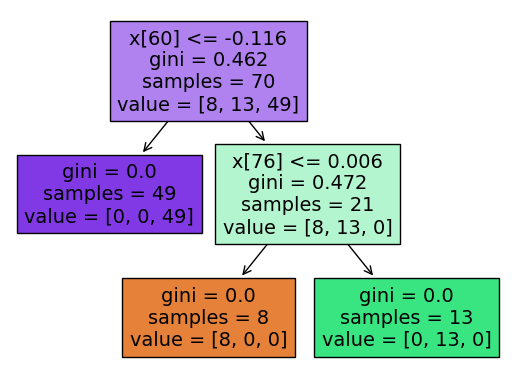

In [29]:
# inspect the tree
tree.plot_tree(clf_tree, filled=True)
plt.show()

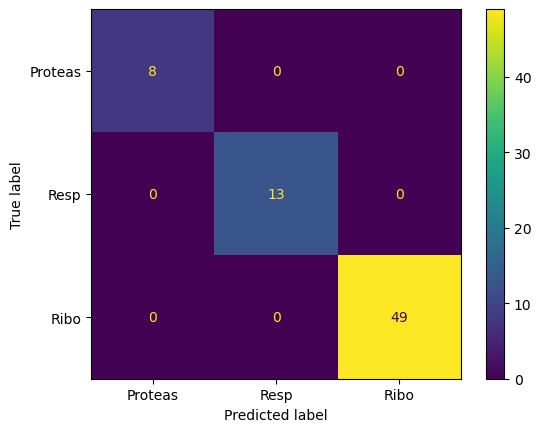

In [30]:
# show confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
        clf_tree, X, y,
        )
plt.show()

Recall from yesterday: The decision tree more or less memorized the data and thereby exactly reproduced it in the predictions, leading to such a good accuracy. This will not generalize to new data.

### Second implementation: Modelling from permutated data

To see that this is the case, we now randomize the target with respect to the features and then repeat the fitting and predicting procedure from above. The learning algorithm can thereby not learn any meaningful connection between the features and the target anymore and as a consequence it should make very bad predictions (in the case of a correct implementation...).

In [18]:
# randomize the target (function) label
y_perm = y.sample(frac=1, random_state = 42).values

# inspect y_perm
display(y_perm)

array([['Ribo'],
       ['Proteas'],
       ['Ribo'],
       ['Proteas'],
       ['Ribo'],
       ['Ribo'],
       ['Resp'],
       ['Ribo'],
       ['Ribo'],
       ['Resp'],
       ['Ribo'],
       ['Resp'],
       ['Resp'],
       ['Proteas'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Resp'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Resp'],
       ['Ribo'],
       ['Proteas'],
       ['Ribo'],
       ['Resp'],
       ['Ribo'],
       ['Proteas'],
       ['Ribo'],
       ['Proteas'],
       ['Resp'],
       ['Resp'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Ribo'],
       ['Resp'],
       ['Ribo'],
       ['Resp'],
       ['Ribo'],
       ['Ribo

In [25]:
# fit and predict "function" using decision tree
clf_perm = DecisionTreeClassifier(random_state=0)
clf_perm.fit(X, y_perm)
y_perm_pred = clf_perm.predict(X)

# inpsect accuracy
accuracy = accuracy_score(y_perm, y_perm_pred)
print(f"The accuracy is: {accuracy}")

The accuracy is: 1.0


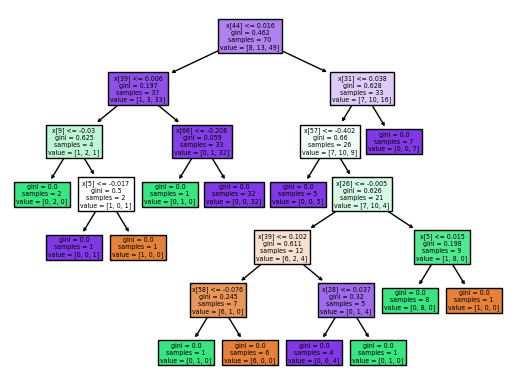

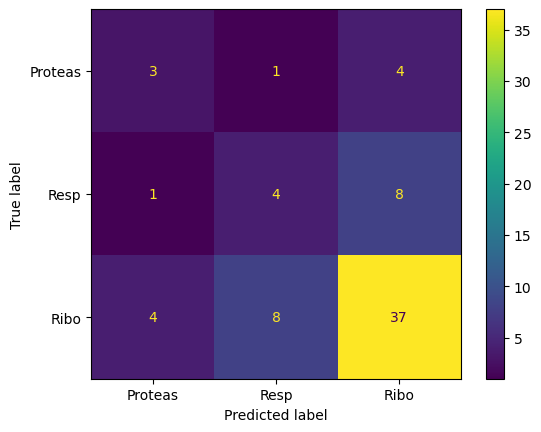

In [26]:
# inspect the tree
tree.plot_tree(clf_perm, filled=True)
plt.show()

# show confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
        clf_perm, X, y,
        )
plt.show()

Although there should be no meaningful information being left between features and the target, the accuracy is still 1. This confirms the overfitting of the algorithm in the example.

### Third implementation: Test the model on a separate dataset (correct)

The correct approach is to test the model on data it has not been trained on before. this requires splitting the data into a train and a test set. We do this again with the permutated target to show that there should be an accuracy at chance level.

In [31]:
# split train and test data
X_train, X_test, y_perm_train, y_perm_test = train_test_split(
    X, y_perm, random_state=0)

In [32]:
# fit and predict "function" using decision tree
clf_split = DecisionTreeClassifier(random_state=0)
clf_split.fit(X_train, y_perm_train)
y_perm_pred = clf_split.predict(X_test)

In [33]:
# inspect accuracy
accuracy = accuracy_score(y_perm_test, y_perm_pred)
print(f"The accuracy is: {accuracy}")

The accuracy is: 0.5555555555555556


And indeed, the accuracy on the test set is now around chance level. The confusion matrix confirms the difference to the previous setup.

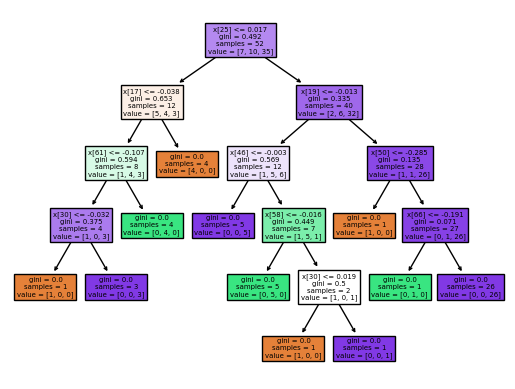

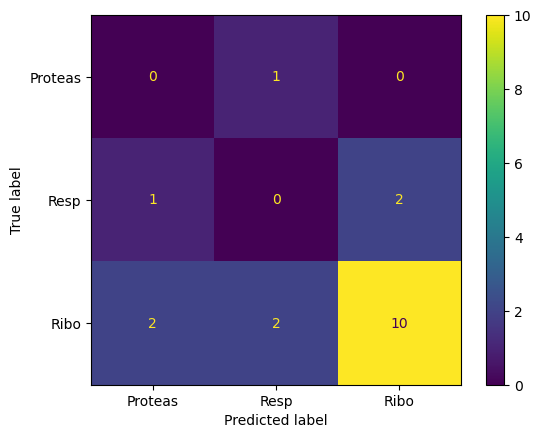

In [34]:
# inspect the tree
tree.plot_tree(clf_split, filled=True)
plt.show()

# show confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
        clf_split, X_test, y_perm_test,
        )
plt.show()

### Thinking exercise
What problems do you see with the distribution of samples between the different `function` groups, particularly for a classification task?

### Fourth implementation: Cross validation
However, even with a train test split there is still a risk of overfitting on the test set (e.g. if parameters are tweaked until the estimator performs optimally). Cross-validation can solve this problem by splitting the data in many train and validation sets and thereby getting a good estimate of the generalization error.

In [37]:
clf_cv = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf_cv, X, y_perm, cv=5)
display(scores)

array([0.5       , 0.71428571, 0.5       , 0.42857143, 0.5       ])

We split the datset into 5 train-validation set splits (`cv=5`) and therefore got 5 estimates of accuracies. The mean accuracy and its standard deviation are given by:

In [40]:
print(f'The mean accuracy is {scores.mean():.2f} with a standard deviation of {scores.std():.2f}.')


The mean accuracy is 0.53 with a standard deviation of 0.10.


### Exercise
Draw a scheme of the CV approach. How is the data split into folds?